In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk, string, re

In [2]:
df = pd.read_excel('3879190491209924863.xlsx')

In [3]:
data = df.copy()

In [4]:
# count and see the columns
print("(#Rows, #Columns) :", data.shape)
data.columns

(#Rows, #Columns) : (42368, 32)


Index(['TweetPostedTime', 'TweetID', 'TweetBody', 'TweetRetweetFlag',
       'TweetSource', 'TweetInReplyToStatusID', 'TweetInReplyToUserID',
       'TweetInReplyToScreenName', 'TweetRetweetCount', 'TweetFavoritesCount',
       'TweetHashtags', 'TweetPlaceID', 'TweetPlaceName', 'TweetPlaceFullName',
       'TweetCountry', 'TweetPlaceBoundingBox', 'TweetPlaceAttributes',
       'TweetPlaceContainedWithin', 'UserID', 'UserName', 'UserScreenName',
       'UserLocation', 'UserDescription', 'UserLink', 'UserExpandedLink',
       'UserFollowersCount', 'UserFriendsCount', 'UserListedCount',
       'UserSignupDate', 'UserTweetCount', 'MacroIterationNumber',
       'tweet.place'],
      dtype='object')

In [5]:
data.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,...,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,1,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,1,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,0,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,...,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",1,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,...,"Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",1,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,...,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


### Count missing values as well as percentage of missing values

In [6]:
def count_missing(df):
    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df[missing_df['missing_count']>0]
    missing_df['missing_perc'] = missing_df['missing_count']/df.shape[0]*100
    missing_df = missing_df.sort_values(by='missing_count')
    return missing_df

count_missing(data)

,column_name,missing_count,missing_perc
10,TweetHashtags,100,0.236027
22,UserDescription,4364,10.300227
21,UserLocation,16019,37.809196
23,UserLink,25769,60.821847
24,UserExpandedLink,25806,60.909177
11,TweetPlaceID,41368,97.639728
12,TweetPlaceName,41368,97.639728
13,TweetPlaceFullName,41368,97.639728
15,TweetPlaceBoundingBox,41368,97.639728
31,tweet.place,41368,97.639728


We see that some columns have 97% missing values. We'll drop them as they are useless. Also, two columns have 60% data missing and they are links. We'll drop them too. Get the list of columns to be dropped.

In [7]:
drop_cols = [col for col in data.columns if data[col].isnull().sum()/data.shape[0]*100 > 60]
drop_cols

['TweetInReplyToStatusID',
 'TweetInReplyToUserID',
 'TweetInReplyToScreenName',
 'TweetPlaceID',
 'TweetPlaceName',
 'TweetPlaceFullName',
 'TweetCountry',
 'TweetPlaceBoundingBox',
 'TweetPlaceAttributes',
 'TweetPlaceContainedWithin',
 'UserLink',
 'UserExpandedLink',
 'tweet.place']

In [8]:
# drop the columns
data = data[[col for col in data.columns if col not in drop_cols]]
data.shape

(42368, 19)

In [9]:
# let's 
count_missing(data)

,column_name,missing_count,missing_perc
7,TweetHashtags,100,0.236027
12,UserDescription,4364,10.300227
11,UserLocation,16019,37.809196


In [10]:
# Check data types
data.dtypes

TweetPostedTime         object
TweetID                  int64
TweetBody               object
TweetRetweetFlag         int64
TweetSource             object
TweetRetweetCount        int64
TweetFavoritesCount      int64
TweetHashtags           object
UserID                   int64
UserName                object
UserScreenName          object
UserLocation            object
UserDescription         object
UserFollowersCount       int64
UserFriendsCount         int64
UserListedCount          int64
UserSignupDate          object
UserTweetCount           int64
MacroIterationNumber     int64
dtype: object

#### Let's inspect different datatype columns seperately

In [11]:
def col_type_is(dtype):
    type_cols = data.select_dtypes(include=[dtype]).columns
    return type_cols, len(type_cols)

In [12]:
col_type_is('object')

(Index(['TweetPostedTime', 'TweetBody', 'TweetSource', 'TweetHashtags',
        'UserName', 'UserScreenName', 'UserLocation', 'UserDescription',
        'UserSignupDate'],
       dtype='object'), 9)

In [13]:
col_type_is('int')

(Index(['TweetID', 'TweetRetweetFlag', 'TweetRetweetCount',
        'TweetFavoritesCount', 'UserID', 'UserFollowersCount',
        'UserFriendsCount', 'UserListedCount', 'UserTweetCount',
        'MacroIterationNumber'],
       dtype='object'), 10)

In [14]:
col_type_is('float')

(Index([], dtype='object'), 0)

In [15]:
col_type_is('bool')

(Index([], dtype='object'), 0)

There are 9 object-type, 9 int-type, 0 float-type & 1 boolean-type columns

Encode TweetRetweetFlag column as only numbers are allowed

In [16]:
data['TweetRetweetFlag'] = data['TweetRetweetFlag'].map({'True':1,
                                                         'False':0,
                                                        })

In [17]:
# which ones are int-type
data[col_type_is('int')[0]].head()

,TweetID,TweetRetweetCount,TweetFavoritesCount,UserID,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,MacroIterationNumber
0,811163485052817408,1,0,3325724261,6334,6144,1917,33556,0
1,811163483463122944,1,0,101222953,154,371,180,3201,0
2,811163466387988480,0,0,42725028,23433,24762,961,147958,0
3,811163465125679104,1,0,3541532718,11136,10081,978,28988,0
4,811163457508642817,3065,0,773556998034063360,55,21,31,19581,0


In [18]:
# TweetID and UserID look integer type but they are categorical. Let's drop these 2 columns with high cardinality
data = data.drop(['TweetID', 'UserID'],1)
data[col_type_is('int')[0]].head()

,TweetRetweetCount,TweetFavoritesCount,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,MacroIterationNumber
0,1,0,6334,6144,1917,33556,0
1,1,0,154,371,180,3201,0
2,0,0,23433,24762,961,147958,0
3,1,0,11136,10081,978,28988,0
4,3065,0,55,21,31,19581,0


## Let's explore our numerical data

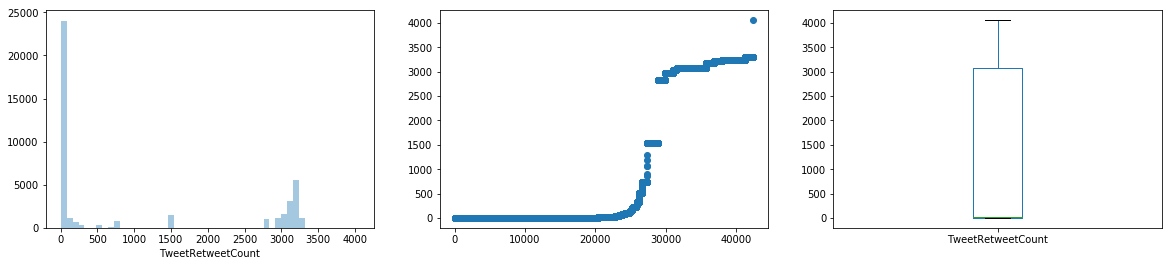

In [19]:
def plot_num(df, col, bins=50, log=False):
    
    if log==True:
        plt.figure(1, figsize=(20,4))
        plt.subplot(131)
        sns.distplot(np.log1p(df[col].dropna()), bins=bins, kde=False)

        plt.subplot(132)
        plt.scatter(range(df.shape[0]), np.sort(np.log1p(df[col].values)))

        plt.subplot(133)
        np.log1p(df[col]).plot.box()

        plt.show()
        
        
    else:
        plt.figure(1, figsize=(20,4))
        plt.subplot(131)
        sns.distplot(df[col].dropna(), bins=bins, kde=False)

        plt.subplot(132)
        plt.scatter(range(df.shape[0]), np.sort(df[col].values))

        plt.subplot(133)
        df[col].plot.box()

        plt.show()

# target variable
plot_num(data, 'TweetRetweetCount')

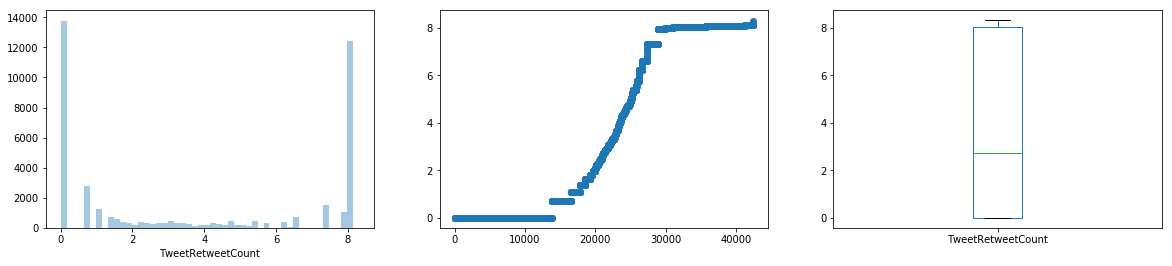

In [20]:
# log(1+y)
plot_num(data, 'TweetRetweetCount', log=True)

Our target variable has highly skewed data, even after log transformation.

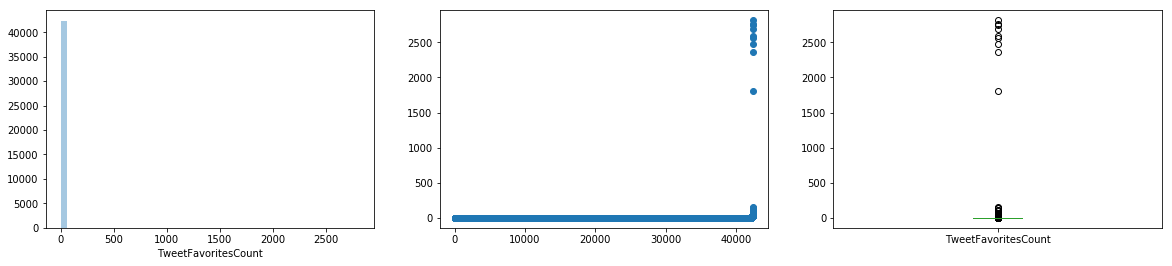

In [21]:
plot_num(data, 'TweetFavoritesCount')

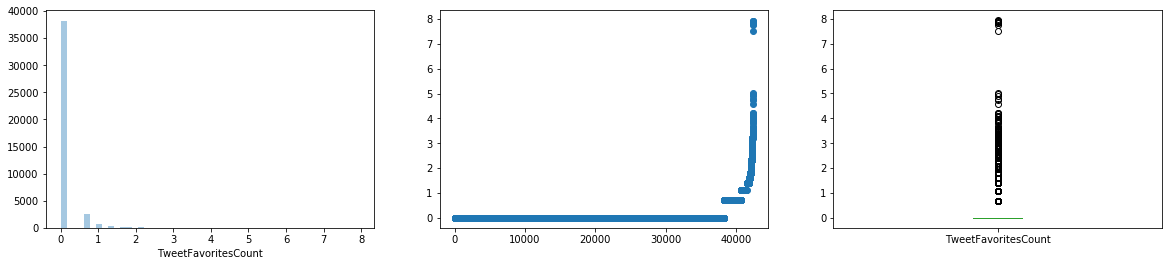

In [22]:
plot_num(data, 'TweetFavoritesCount', log=True)

TweetFavoritesCount is having unoform value. We'll drop it.

In [23]:
data = data.drop('TweetFavoritesCount', 1)

In [24]:
# def unique_count(df):
#     unique_count = df.apply(lambda x: len(x.unique())).reset_index()
#     unique_count.columns = ['column_name', 'unique_values']
#     unique_count = unique_count.sort_values(by='unique_values', ascending=False)
#     return unique_count

In [25]:
# unique_count(data[col_type_is('int')[0]])

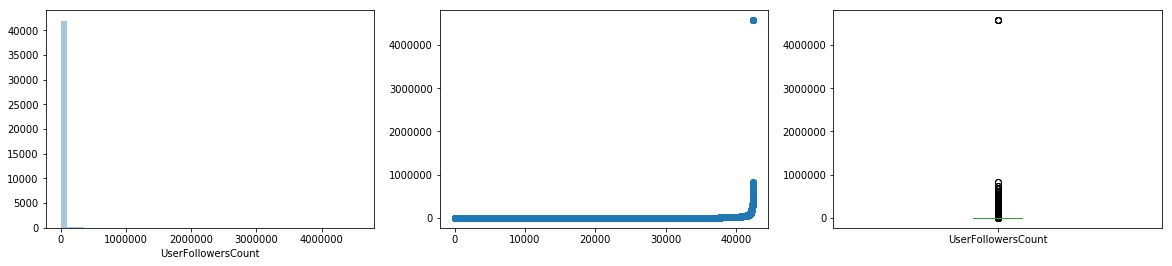

In [26]:
plot_num(data, 'UserFollowersCount')

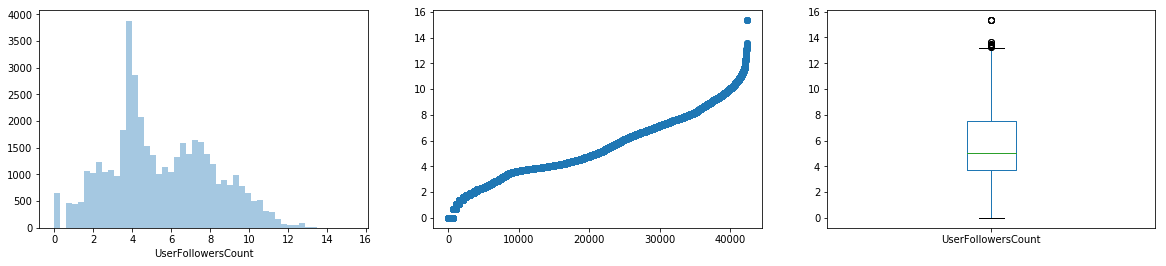

In [27]:
plot_num(data, 'UserFollowersCount', log=True)

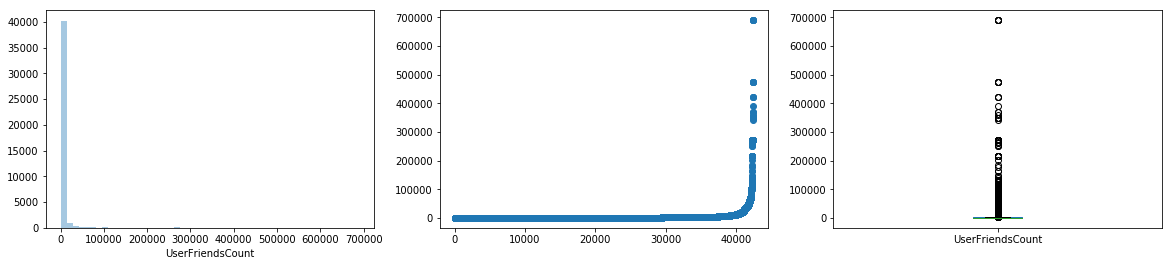

In [28]:
plot_num(data, 'UserFriendsCount')

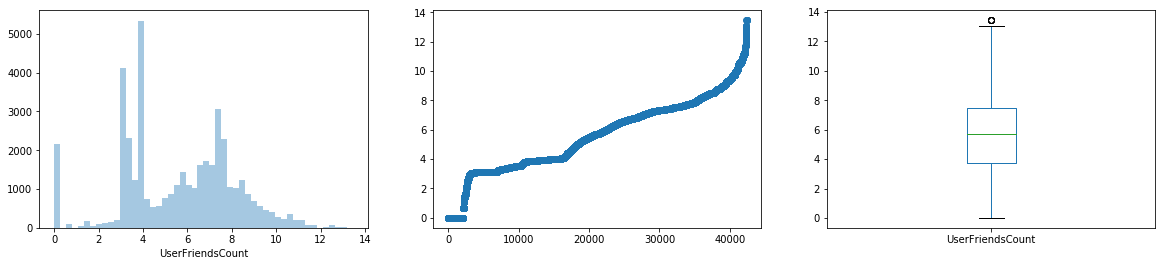

In [29]:
plot_num(data, 'UserFriendsCount', log=True)

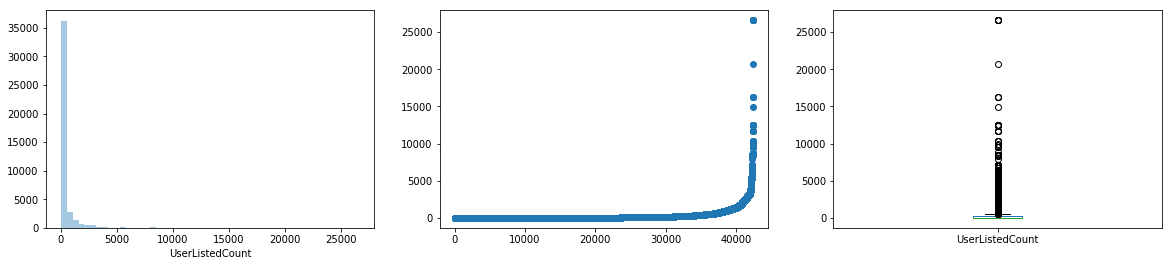

In [30]:
plot_num(data, 'UserListedCount')

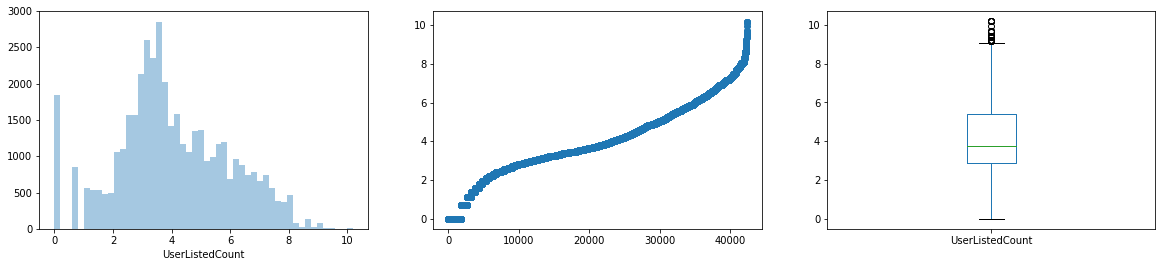

In [31]:
plot_num(data, 'UserListedCount', log=True)

In [32]:
# drop ; uniform data
data = data.drop('UserListedCount', 1)

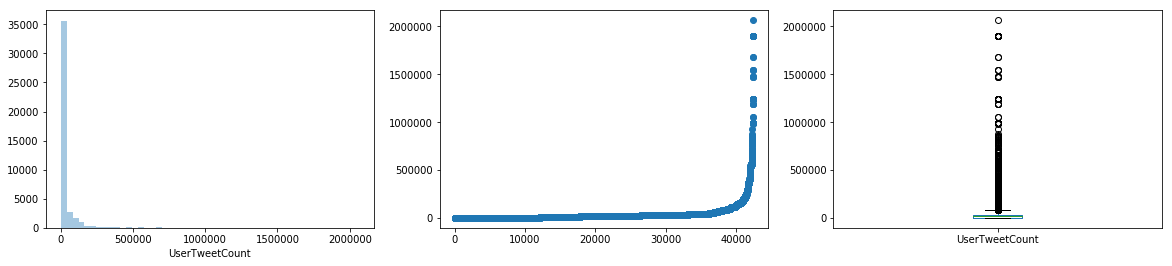

In [33]:
plot_num(data, 'UserTweetCount')

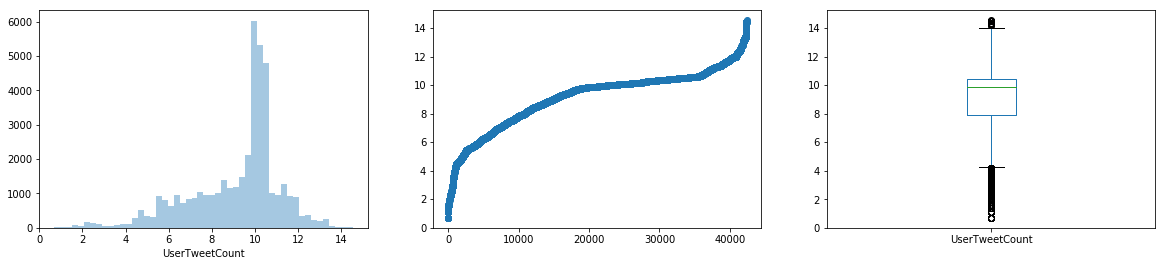

In [34]:
plot_num(data, 'UserTweetCount', log=True)

In [35]:
# drop; too many outliers
data = data.drop('UserTweetCount', 1)

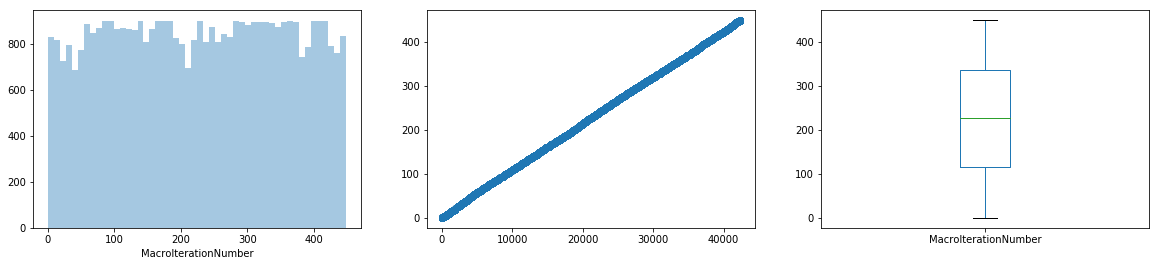

In [36]:
plot_num(data, 'MacroIterationNumber')

In [37]:
data[col_type_is('int')[0]].head()

,TweetRetweetCount,UserFollowersCount,UserFriendsCount,MacroIterationNumber
0,1,6334,6144,0
1,1,154,371,0
2,0,23433,24762,0
3,1,11136,10081,0
4,3065,55,21,0


## Categorical data

In [38]:
data.head()

,TweetPostedTime,TweetBody,TweetRetweetFlag,TweetSource,TweetRetweetCount,TweetHashtags,UserName,UserScreenName,UserLocation,UserDescription,UserFollowersCount,UserFriendsCount,UserSignupDate,MacroIterationNumber
0,Tue Dec 20 10:57:00 +0000 2016,RT @BeachyMaldives: Local interaction is a gre...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1,"Maldives, vacation, travel",CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,6334,6144,Sun Jun 14 22:36:15 +0000 2015,0
1,Tue Dec 20 10:56:59 +0000 2016,RT @TechTerraEd: Need #giftideas for your kid(...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1,"giftideas, holiday",monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",154,371,Sat Jan 02 13:36:23 +0000 2010,0
2,Tue Dec 20 10:56:55 +0000 2016,Seven Questions Before Choosing a Cruise Line ...,NaN,"<a href=""http://www.google.com/"" rel=""nofollow...",0,"travel, TTOT",Paula Schuck,inkscrblr,Canada,Thrifty Mom Media social media consulting and ...,23433,24762,Tue May 26 21:26:09 +0000 2009,0
3,Tue Dec 20 10:56:55 +0000 2016,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",NaN,"<a href=""https://roundteam.co"" rel=""nofollow"">...",1,"yoga, bresil, meditation, holiday",Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",11136,10081,Sat Sep 12 20:29:18 +0000 2015,0
4,Tue Dec 20 10:56:53 +0000 2016,"RT @StylishRentals: Love this! ""Palm Springs M...",NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",3065,Travel,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,55,21,Wed Sep 07 16:22:15 +0000 2016,0


In [39]:
data = data.drop(['TweetSource','UserScreenName', 'UserLocation'], 1)

In [40]:
data['UserDescription'].head()

0    Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...
1    Educator of students with special needs, Mothe...
2    Thrifty Mom Media social media consulting and ...
3    Adventure travel, yoga, paleo, Crossfit, runni...
4    I really have got giant ambitions. I start com...
Name: UserDescription, dtype: object

In [41]:
data['TweetHashtags'].head()

0           Maldives, vacation, travel
1                   giftideas, holiday
2                         travel, TTOT
3    yoga, bresil, meditation, holiday
4                               Travel
Name: TweetHashtags, dtype: object

#### Remove twitter handles, hashtags & URLs

In [42]:
# remove twitter handles
data['TweetBody'] = data['TweetBody'].apply(lambda x: re.sub(r"@[\w]*", "", x))
# remove hashtags
data['TweetBody'] = data['TweetBody'].str.replace("#[\w]*", "")
# remove URLs
data['TweetBody'] = data['TweetBody'].str.replace("http\S+", "")
# remove special characters
data['TweetBody'] = data['TweetBody'].str.replace("[^a-zA-Z#]", " ")

# Check first 5 messages
data['TweetBody'].head()

0    RT   Local interaction is a great way to gain ...
1    RT   Need  for your kid s   Read our Top     G...
2     Seven Questions Before Choosing a Cruise Line   
3    RT   Yoga do Brasil  un havre de paix   l autr...
4    RT   Love this   Palm Springs Mid century Mode...
Name: TweetBody, dtype: object

#### Remove special characters

In [43]:
data['TweetBody'] = data['TweetBody'].str.replace("[^a-zA-Z]", " ")
# Check first 5 messages
data['TweetBody'].head()

0    RT   Local interaction is a great way to gain ...
1    RT   Need  for your kid s   Read our Top     G...
2     Seven Questions Before Choosing a Cruise Line   
3    RT   Yoga do Brasil  un havre de paix   l autr...
4    RT   Love this   Palm Springs Mid century Mode...
Name: TweetBody, dtype: object

In [44]:
data['TweetBody'] = data['TweetBody'].apply(lambda x: x.lower())
data['TweetBody'].head()

0    rt   local interaction is a great way to gain ...
1    rt   need  for your kid s   read our top     g...
2     seven questions before choosing a cruise line   
3    rt   yoga do brasil  un havre de paix   l autr...
4    rt   love this   palm springs mid century mode...
Name: TweetBody, dtype: object

#### Remove words that are very short and might not have any meaning

In [45]:
data['TweetBody'] = data['TweetBody'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# Check first 5 messages
data['TweetBody'].head()

0    local interaction great gain insight into mald...
1    need your read gift picks list share email chance
2          seven questions before choosing cruise line
3              yoga brasil havre paix autre bout monde
4    love this palm springs century modern houses r...
Name: TweetBody, dtype: object

#### Remove punctuations and stopwords

In [46]:
data['TweetBody'] = data['TweetBody'].apply(lambda x: " ".join([w for w in x.split() if w not in string.punctuation]))
data['TweetBody'].head()

0    local interaction great gain insight into mald...
1    need your read gift picks list share email chance
2          seven questions before choosing cruise line
3              yoga brasil havre paix autre bout monde
4    love this palm springs century modern houses r...
Name: TweetBody, dtype: object

In [47]:
stopwords = nltk.corpus.stopwords.words('english')

data['TweetBody'] = data['TweetBody'].apply(lambda x: " ".join([w for w in x.split() if w not in stopwords]))
data['TweetBody'].head()

0    local interaction great gain insight maldivian...
1         need read gift picks list share email chance
2                 seven questions choosing cruise line
3              yoga brasil havre paix autre bout monde
4    love palm springs century modern houses rent p...
Name: TweetBody, dtype: object

### Previous operations in clean form at one place:-

In [48]:
from pprint import pprint
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk, string, re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = df.copy()

drop_cols = [col for col in data.columns if data[col].isnull().sum()/data.shape[0]*100 > 90]
data = data[[col for col in data.columns if col not in drop_cols]]
data['TweetRetweetFlag'] = data['TweetRetweetFlag'].map({'True':1,
                                                         'False':0,
                                                        })

# drop_cols = ['TweetID', 'UserID', 'TweetFavoritesCount', 'TweetPostedTime','UserScreenName','UserSignupDate','UserName', \
#             'UserLocation', 'TweetSource', 'UserLink','UserExpandedLink']
# data = data.drop(drop_cols, 1)

# remove twitter handles
data['TweetBody'] = data['TweetBody'].apply(lambda x: re.sub(r"@[\w]*", "", x))
# remove hashtags
data['TweetBody'] = data['TweetBody'].str.replace("#[\w]*", "")
# remove URLs
data['TweetBody'] = data['TweetBody'].str.replace("http\S+", "")
# remove special characters
data['TweetBody'] = data['TweetBody'].str.replace("[^a-zA-Z#]", " ")

data['TweetBody'] = data['TweetBody'].apply(lambda x: x.lower())
data['TweetBody'] = data['TweetBody'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data['TweetBody'] = data['TweetBody'].apply(lambda x: " ".join([w for w in x.split() if w not in string.punctuation]))

stopwords = nltk.corpus.stopwords.words('english')
data['TweetBody'] = data['TweetBody'].apply(lambda x: " ".join([w for w in x.split() if w not in stopwords]))
data['TweetBody'] = data['TweetBody'].str.strip()

lemma = nltk.WordNetLemmatizer()
data['TweetBody_tokens'] = data['TweetBody'].apply(lambda x: [lemma.lemmatize(w, pos="v") for w in x.split()])#as tokens

data['TweetBody_detokenized'] = data['TweetBody_tokens'].apply(lambda x: ' '.join([w for w in x]))#detokenize

all_tweets = ' '.join([text for text in list(data['TweetBody_detokenized'])])

Total word count: ~ 233566
Unique words count: 13452


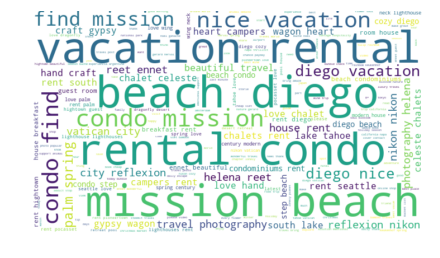

In [49]:
def plot_word_cloud(col):

    print("Total word count: ~", all_tweets.count(' ')+1)
    print("Unique words count:", len( set( all_tweets.split() ) ))

    wordcloud = WordCloud(width=700, height=400, background_color="white").generate(all_tweets)
    # Plot graph
    plt.figure(figsize=(7,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

plot_word_cloud(data['TweetBody_detokenized'])

### Modeling

In [50]:
def model(X, y, model, cv=False):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

    regressor = model
    regressor.fit(X_train, y_train)
    
    pred_train = regressor.predict(X_train)
    pred_test = regressor.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)    
    print('R2_TRAIN = {}'.format(r2_train))
    print('R2_TEST = {}'.format(r2_test))
    scores = pd.DataFrame({'':[rmse_train,rmse_test]}, index=['RMSE_train','RMSE_test'])
    if cv==True:
        cv_score = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
        pprint( np.sqrt(np.abs((cv_score))) )
        mean_CV = np.sqrt(np.abs(np.mean(cv_score)))
        scores = pd.DataFrame({'':[rmse_train,rmse_test, mean_CV]}, index=['RMSE_train','RMSE_test','RMSE_CV'])
    
    return y_train, y_test, pred_train, pred_test, scores

In [51]:
def plot():
    plt.figure(1, figsize=(16,5))

    plt.subplot(1,2,1)
    plt.scatter(range(y_train.shape[0]), np.sort(y_train), marker='|')
    plt.scatter(range(pred_train.shape[0]), np.sort(pred_train), marker=0)
    plt.xlabel('index', fontsize=12)
    plt.ylabel('Retweets', fontsize=12)
    plt.title("Training", fontsize=14)

    plt.subplot(1,2,2)
    plt.scatter(range(y_test.shape[0]), np.sort(y_test), marker='|')
    plt.scatter(range(pred_test.shape[0]), np.sort(pred_test), marker=0)
    plt.xlabel('index', fontsize=12)
    plt.ylabel('Retweets', fontsize=12)
    plt.title("Test", fontsize=14)
    
    plt.show()

In [52]:
vect = TfidfVectorizer()
dtm = vect.fit_transform(data['TweetBody_detokenized'])
# dtm_df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
# dtm_df.head()

Since its a regression problem and is non-linear. Let's apply Random forest regressor.

R2_TRAIN = 0.9980629186087281
R2_TEST = 0.9975475189774642


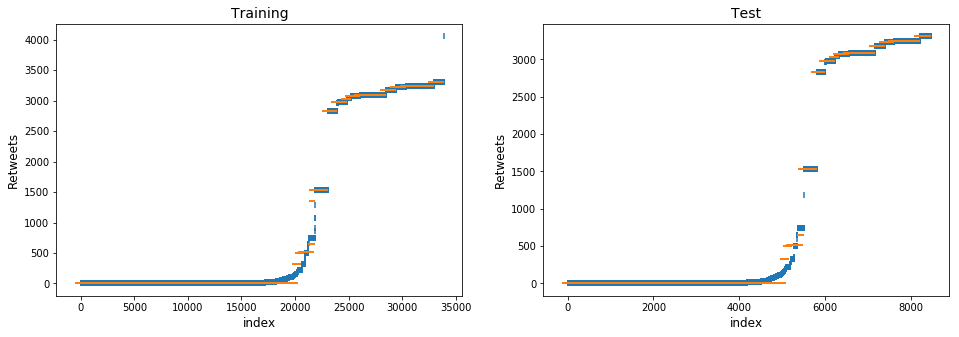

(None,                      
 RMSE_train  63.097058
 RMSE_test   70.703915)

In [53]:
rf = RandomForestRegressor(bootstrap=False, n_estimators=400, max_depth=8, \
                           min_samples_leaf=3, min_samples_split=8, n_jobs=4)
y_train, y_test, pred_train, pred_test, scores = model(dtm, data.TweetRetweetCount, rf)
plot(), scores

### Things that can be done further:-

- Include hashtag
- Include other integer columns
- Including Timestamp columns and transform them into
    - day of the week
    - hour slots in a day
- Grid Search with xgboost   

Due to constraints on laptop configuration. These won't be possible.

In [ ]:
# def model_grid_search(col, vectorizer, model, param_grid):
#     dtm = vectorizer.fit_transform(col)
#     X = dtm
#     print(X.shape)
#     y = data.TweetRetweetCount
#     gs = GridSearchCV(estimator = model, param_grid = param_grid, 
#                           cv = 5, n_jobs = -1, verbose = 2)
#     gs.fit(X,y)
#     return gs.best_params_, gs.best_score_